<a href="https://colab.research.google.com/github/busrakurt7/movie_ratings_analysis/blob/main/Movie_ratings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will need to upload a kaggle.json file as per the instructions here: https://www.kaggle.com/docs/api

## **Research Question:**

Does the director of the movies impact ratings?

### ***Hypothesis:***

There is no difference between Woody Allen movies ratings and average ratings for all other directors’ movies.

### ***Methods:***

Filter dataset to control confounding variables.
(Genre & year)

A/A test for recent comedy movies.

A/A test for Woody Allen movies.

t-test for recent comedy movies and Woody Allen movies.

In [ ]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os
import zipfile
import math

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
#downloading dataset from kaggle
!kaggle datasets download -d stefanoleone992/imdb-extensive-dataset

 92% 76.0M/82.3M [00:00<00:00, 58.8MB/s]
100% 82.3M/82.3M [00:00<00:00, 89.3MB/s]


In [ ]:
#unzipping downloaded files
with zipfile.ZipFile('imdb-extensive-dataset.zip', 'r') as zipref:
  zipref.extractall()


In [ ]:
#creating movies dataframe 
movies = pd.read_csv('IMDb movies.csv')
movies.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
#replacing 'TV Movie 2019' with '2019'
movies.loc[:,'year'].replace('TV Movie 2019','2019', inplace=True)

In [ ]:
movies['year'].unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
#changing datatype of 'year'
movies=movies.astype({"year":'int64'})
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  int64  
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
#creating dataframe for the comedy genre after 1990
all_comedy=movies.loc[((movies['genre'].str.contains('Comedy')) & (movies['year']>1990)), :]

comedy_recent = all_comedy.loc[~(all_comedy['director'] == 'Woody Allen'), :]
comedy_recent.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,"Steven Rogers, James Mangold",Konrad Pictures,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",An English Duke from 1876 is inadvertedly drag...,6.4,77852,$ 48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
19545,tt0081145,Harry e Carota,Me and the Kid,1993,1993-10-22,"Comedy, Crime, Drama",94,USA,English,Dan Curtis,"Stanley Cohen, Richard Tannenbaum",Dan Curtis Productions,"Danny Aiello, Alex Zuckerman, Joe Pantoliano, ...",A lonely and emotionally neglected rich kid fo...,5.4,242,NaN,$ 60473,NaN,NaN,3.0,NaN
21806,tt0088751,The Naked Monster,The Naked Monster,2005,2005-04-22,"Comedy, Horror, Sci-Fi",100,USA,English,"Wayne Berwick, Ted Newsom",Ted Newsom,Heidelberg Films,"Kenneth Tobey, Brinke Stevens, R.G. Wilson, Jo...","A brain-dead sheriff, a stolid secret agent an...",5.4,264,PYG 350000000,NaN,NaN,NaN,15.0,8.0
23295,tt0093309,Jiang shi zhi zun,Jiang shi zhi zun,1991,1991-01-01,"Comedy, Horror",88,Hong Kong,"Cantonese, Mandarin",Andrew Lau,Chak-Chi Lok,Eagle Film Production Company,"Ching-Ying Lam, Siu-Ho Chin, Ronald Wong, Carr...","""Vampire Buster"" Lam Ching-Ying returns as Mas...",6.5,117,NaN,NaN,NaN,NaN,2.0,2.0
24726,tt0097766,Lo que le pasó a Santiago,Lo que le pasó a Santiago,1995,1995-10-05,"Comedy, Drama, Romance",105,Puerto Rico,Spanish,Jacobo Morales,Jacobo Morales,Bacalao Inc.,"Tommy Muñiz, Gladys Rodríguez, Johanna Rosaly,...","Santiago, a retired accountant, casually meets...",7.0,207,$ 800000,NaN,NaN,NaN,5.0,NaN


## **A/A Test for All Movies**

### ***Hypothesis:***

There is no significant difference in ratings between the samples. 

### ***Result:***

Fail to reject the null that there is no significant difference in ratings between the samples.

The p-value of 0.92 is not less than the .05 threshold we need to reject the null. 

### ***Conclusion:***

We conclude that the confounding variables have been controlled for. 

In [ ]:
#creating first random sample from 'comedy_recent'
comedy_sample_1=comedy_recent.sample(frac=0.5)

#size of the first sample
len(comedy_sample_1)

9658

In [ ]:
#creating second sample from 'comedy_recent'
comedy_sample_2=comedy_recent.drop(comedy_sample_1.index)

#size of the second sample
len(comedy_sample_2)

9659

In [ ]:
#running a/a test for comedy_recent
stats.ttest_ind(comedy_sample_1['avg_vote'], comedy_sample_2['avg_vote'])

Ttest_indResult(statistic=0.48535643064054496, pvalue=0.6274290376912831)

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
comedy_sample_1_n = comedy_sample_1.shape[0]
comedy_sample_2_n = comedy_sample_2.shape[0]
comedy_sample_1_mean = comedy_sample_1['avg_vote'].mean()
comedy_sample_2_mean = comedy_sample_2['avg_vote'].mean()
comedy_sample_1_var = comedy_sample_1['avg_vote'].var()
comedy_sample_2_var = comedy_sample_2['avg_vote'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals for comedy_sample_1.
std_err_comedy_1 = math.sqrt(comedy_sample_1_var/comedy_sample_1_n)

margin_of_error = 1.96 * std_err_comedy_1

ci_lower = comedy_sample_1_mean - margin_of_error
ci_upper = comedy_sample_1_mean + margin_of_error

print("With 95% confidence the ratings mean is between "+str(ci_lower)+" and "+str(ci_upper)+".")



With 95% confidence the ratings mean is between 5.659353692101757 and 5.707202530718661.


In [ ]:
# Calculate the standard error and compute the confidence intervals for comedy_sample_2.
std_err_comedy_2 = math.sqrt(comedy_sample_2_var/comedy_sample_2_n)

margin_of_error = 1.96 * std_err_comedy_2

ci_lower = comedy_sample_2_mean - margin_of_error
ci_upper = comedy_sample_2_mean + margin_of_error

print("With 95% confidence the ratings mean is between "+str(ci_lower)+" and "+str(ci_upper)+".")



With 95% confidence the ratings mean is between 5.65052088433581 and 5.69914264190918.


In [ ]:
# Create dataframe for bar plot.
comedy_sample_1['director']='Directors 1'
comedy_sample_2['director']='Directors 2'
comedy_1=comedy_sample_1.loc[:,['director','avg_vote']]
comedy_2=comedy_sample_2.loc[:,['director','avg_vote']]
values_comedy=pd.concat([comedy_1,comedy_2])


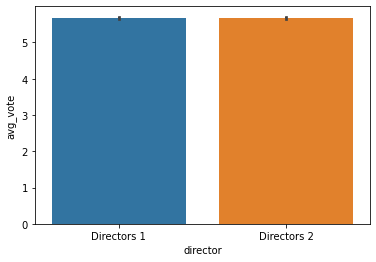

In [ ]:
sns.barplot(x='director',y= 'avg_vote', yerr=[std_err_comedy_1, std_err_comedy_2], data=values_comedy)

## **A/A Test for Woody Allen Movies**

### ***Hypothesis:***

There is no significant difference in ratings between the samples. 

### ***Result:***

Fail to reject the null that there is no significant difference in ratings between the samples.

The p-value of 0.51 is not less than the .05 threshold we need to reject the null. 

### ***Conclusion:***

We conclude that the confounding variables have been controlled for. 

In [ ]:
#creating dataframe for Woody Allen movies from comedy_recent
woody_allen=all_comedy.loc[all_comedy['director']=='Woody Allen',:]
woody_allen.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
26624,tt0104466,Mariti e mogli,Husbands and Wives,1992,1992-10-31,"Comedy, Drama, Romance",108,USA,English,Woody Allen,Woody Allen,Jack Rollins & Charles H. Joffe Productions,"Nick Metropolis, Woody Allen, Mia Farrow, Sydn...",When their best friends announce that they're ...,7.5,26864,$ 20000000,$ 10555619,$ 10555619,NaN,89.0,58.0
26893,tt0105378,Ombre e nebbia,Shadows and Fog,1991,1992-03-06,Comedy,85,USA,English,Woody Allen,Woody Allen,Jack Rollins & Charles H. Joffe Productions,"Michael Kirby, Woody Allen, David Ogden Stiers...","With a serial strangler on the loose, a bookke...",6.7,15840,$ 14000000,$ 2735731,$ 2735731,NaN,83.0,38.0


In [ ]:
#creating first random sample from woody_allen
woody_sample_1=woody_allen.sample(frac=0.5)

#checking the size of first sample
len(woody_sample_1)

12

In [ ]:
#creating second sample from woody_allen
woody_sample_2=woody_allen.drop(woody_sample_1.index)

#checking the size of second sample
len(woody_sample_2)

12

In [ ]:
#running a/a test for woody_allen
stats.ttest_ind(woody_sample_1['avg_vote'],woody_sample_2['avg_vote'])

Ttest_indResult(statistic=0.5643190330384532, pvalue=0.5782456490571877)

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
woody_sample_1_n = woody_sample_1.shape[0]
woody_sample_2_n = woody_sample_2.shape[0]
woody_sample_1_mean = woody_sample_1['avg_vote'].mean()
woody_sample_2_mean = woody_sample_2['avg_vote'].mean()
woody_sample_1_var = woody_sample_1['avg_vote'].var()
woody_sample_2_var = woody_sample_2['avg_vote'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals for comedy_sample_1.
std_err_woody_1 = math.sqrt(woody_sample_1_var/woody_sample_1_n)

margin_of_error = 1.96 * std_err_woody_1

ci_lower = woody_sample_1_mean - margin_of_error
ci_upper = woody_sample_1_mean + margin_of_error

print("With 95% confidence the ratings mean is between "+str(ci_lower)+" and "+str(ci_upper)+".")


With 95% confidence the ratings mean is between 6.6323873894706225 and 7.117612610529376.


In [ ]:
# Calculate the standard error and compute the confidence intervals for comedy_sample_1.
std_err_woody_2 = math.sqrt(woody_sample_2_var/woody_sample_2_n)

margin_of_error = 1.96 * std_err_woody_2

ci_lower = woody_sample_2_mean - margin_of_error
ci_upper = woody_sample_2_mean + margin_of_error

print("With 95% confidence the ratings mean is between "+str(ci_lower)+" and "+str(ci_upper)+".")


With 95% confidence the ratings mean is between 6.5264619107296005 and 7.023538089270402.


In [ ]:
# Create dataframe for bar plot.
woody_sample_2['director']='Woody Allen 2'
woody_1=woody_sample_1.loc[:,['director','avg_vote']]
woody_2=woody_sample_2.loc[:,['director','avg_vote']]
values_woody=pd.concat([woody_1,woody_2])


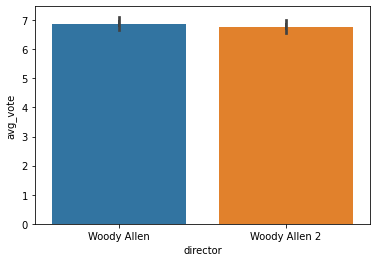

In [ ]:
sns.barplot(x='director',y= 'avg_vote', yerr=[std_err_woody_1, std_err_woody_2], data=values_woody)

## **A/B Test of Ratings**

### ***Hypothesis:***

There is no difference between Woody Allen movies ratings and average ratings for all other directors’ movies. 

### ***Result:***

Reject the null that there is no difference between Woody Allen movies ratings and average ratings for all other directors’ movies.

The p-value is less than the .05 threshold we need to reject the null. 

### ***Conclusion:***

We conclude that director of the movies impacts the rating. 

In [ ]:
#running t-test for comedy_recent and woody_allen
stats.ttest_ind(comedy_recent['avg_vote'],woody_allen['avg_vote'])

Ttest_indResult(statistic=-4.641801005146197, pvalue=3.4765313916619776e-06)

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
comedy_n = comedy_recent.shape[0]
woody_n = woody_allen.shape[0]
comedy_mean = comedy_recent['avg_vote'].mean()
woody_mean = woody_allen['avg_vote'].mean()
comedy_var = comedy_recent['avg_vote'].var()
woody_var = woody_allen['avg_vote'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals for comedy_recent.
std_err_comedy = math.sqrt(comedy_var/comedy_n)

margin_of_error = 1.96 * std_err_comedy

ci_lower = comedy_mean - margin_of_error
ci_upper = comedy_mean + margin_of_error

print("With 95% confidence the ratings mean is between "+str(ci_lower)+" and "+str(ci_upper)+".")



With 95% confidence the ratings mean is between 5.662000741404299 and 5.696108695879008.


In [ ]:
# Calculate the standard error and compute the confidence intervals for woody_allen.
std_err_woody = math.sqrt(woody_var/woody_n)

margin_of_error = 1.96 * std_err_woody

ci_lower = woody_mean - margin_of_error
ci_upper = woody_mean + margin_of_error

print("With 95% confidence the ratings mean is between "+str(ci_lower)+" and "+str(ci_upper)+".")

With 95% confidence the ratings mean is between 6.653931702765121 and 6.996068297234878.


In [ ]:
print(comedy_mean)
print(woody_mean)

5.679054718641654
6.824999999999999


In [ ]:
# Create dataframe for bar plot.
comedy_new=comedy_recent.copy()
comedy_new.loc[:,'director'] = 'Average Rating'
woody=woody_allen.loc[:, ['director', 'avg_vote']]
comedy=comedy_new.loc[:,['director', 'avg_vote']]
values = pd.concat([woody, comedy])

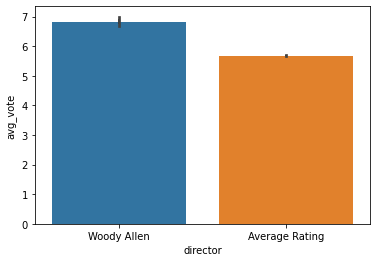

In [ ]:
sns.barplot(x='director',y= 'avg_vote', yerr=[std_err_woody, std_err_comedy], data=values)